Pada Tugas kali ini kita akan membuat 4 function yang memiliki fungsinya masing-masing.
Data yang diambil berasal dari berkas imdb_movie_dumpfile.sql
Silahkan import dumpfile tersebut dengan menggunakan terminal/cmd.

Jika ada proses yang dilakukan boleh dilakukan dari query sql, atau menggunakan python setelah semua data ditampilkan menggunakan sql. 

In [221]:
#Taruh semua library/package dsini
from mysql.connector import connect
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [222]:
#Pada sel ini peserta diminta untuk melakukan koneksi terhadap database.
db = connect(
    host="localhost",
    user="root",
    password="Th4nkY0uMySql!",
    database="imdb"
)

print(db)

1. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 5 direktur dengan jumlah film terbanyak dalam daftar. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 5.

In [223]:
def most_maker_director():
    db.reconnect(attempts=1, delay=0)
    cursor_db = db.cursor()
    query = '''
    SELECT
    director_name,
    COUNT(director_name) AS movie_count
    FROM movies
    GROUP BY director_name
    ORDER BY movie_count DESC
    LIMIT 5
    '''
    cursor_db.execute(query)
    data = cursor_db.fetchall()
    cursor_db.close()
    
    i = 1
    j = 0
    result = []
    for name in data:
        result.append(f"{i}. {name[0]}")
        j += 1
        i += 1
    
    return print(*result, sep="\n")

2. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 10 direktur dengan total jumlah pendapatan terbesar untuk semua film yang dia buat. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 10 beserta total pendapatan dari masing-masing direktur.

Pendapatan bisa didapatkan dari nilai gross

In [224]:
def most_profitable_director():
    db.reconnect(attempts=1, delay=0)
    cursor_db = db.cursor()
    query = '''
    SELECT
    director_name,
    SUM(gross) AS total_gross
    FROM movies
    GROUP BY director_name
    ORDER BY total_gross DESC
    LIMIT 10
    '''
    cursor_db.execute(query)
    data = cursor_db.fetchall()
    cursor_db.close()
    
    i = 1
    j = 0
    result = []
    for name in data:
        result.append("{}. {} - {:,.2f}".format(i, name[0], name[1]))
        j += 1
        i += 1
    
    return print(*result, sep="\n")

3. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 15 film dengan pendapatan terbesar. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 15 beserta pendapatan dari masing-masing film

In [225]:
def most_profitable_movie():
    db.reconnect(attempts=1, delay=0)
    cursor_db = db.cursor()
    query = '''
    SELECT
    movie_title,
    title_year,
    gross
    FROM movies
    ORDER BY gross DESC
    LIMIT 15
    '''
    cursor_db.execute(query)
    data = cursor_db.fetchall()
    cursor_db.close()
    
    i = 1
    j = 0
    result = []
    for movie in data:
        result.append("{}. {} ({:.0f}) - {:,.2f}".format(i, movie[0], movie[1], movie[2]))
        j += 1
        i += 1
    
    return print(*result, sep="\n")

4. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan plot distribusi budget dari semua film pada tahun yang ditentukan. fungsi ini memiliki input, yaitu adalah tahun.

In [235]:
def budget_distribution(year):
    db.reconnect(attempts=1, delay=0)
    cursor_db = db.cursor()
    query = '''
    SELECT budget
    FROM movies
    WHERE
    title_year = {} AND
    budget IS NOT NULL
    '''.format(year)
    cursor_db.execute(query)
    data = cursor_db.fetchall()
    cursor_db.close()
    
    result = []
    for budget in data:
        result.append(budget[0])
    
    sns.histplot(result,
                 bins=20,
                 kde=True,
                 color="#7f7fff")
    plt.title("Budget Movie Year {}".format(year),
              fontweight="bold",
              fontsize=15,
              pad=15)
    plt.xlabel("Budget")
    plt.ylabel("Count");
    return

Semua sel di bawah digunakan untuk pemanggilan fungsi dan menunjukan hasil yang diharapkan.

In [240]:
most_maker_director()

1. Steven Spielberg
2. Woody Allen
3. Martin Scorsese
4. Clint Eastwood
5. Ridley Scott


In [241]:
most_profitable_director()

1. Steven Spielberg - 4,114,233,101.00
2. Peter Jackson - 2,592,969,279.00
3. Michael Bay - 2,231,242,537.00
4. Tim Burton - 2,071,275,480.00
5. Sam Raimi - 2,049,549,198.00
6. James Cameron - 1,948,125,910.00
7. Christopher Nolan - 1,813,227,576.00
8. George Lucas - 1,741,418,480.00
9. Robert Zemeckis - 1,619,309,108.00
10. Chris Columbus - 1,618,707,624.00


In [242]:
most_profitable_movie()

1. Avatar  (2009) - 760,505,847.00
2. Titanic  (1997) - 658,672,302.00
3. Jurassic World  (2015) - 652,177,271.00
4. The Avengers  (2012) - 623,279,547.00
5. The Dark Knight  (2008) - 533,316,061.00
6. Star Wars: Episode I - The Phantom Menace  (1999) - 474,544,677.00
7. Star Wars: Episode IV - A New Hope  (1977) - 460,935,665.00
8. Avengers: Age of Ultron  (2015) - 458,991,599.00
9. The Dark Knight Rises  (2012) - 448,130,642.00
10. Shrek 2  (2004) - 436,471,036.00
11. E.T. the Extra-Terrestrial  (1982) - 434,949,459.00
12. The Hunger Games: Catching Fire  (2013) - 424,645,577.00
13. Pirates of the Caribbean: Dead Man's Chest  (2006) - 423,032,628.00
14. The Lion King  (1994) - 422,783,777.00
15. Toy Story 3  (2010) - 414,984,497.00


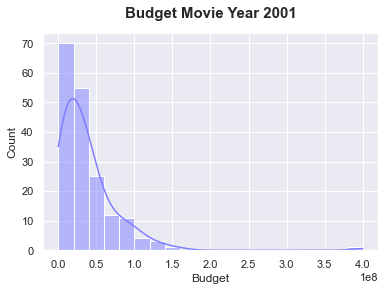

In [243]:
year = 2001
budget_distribution(2001)